In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Analyst_Coding_Test_(1).csv')
df.head()

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0


In [3]:
# quick check for missing values

df.isna().sum()

shape    0
color    0
area     0
dtype: int64

In [4]:
# 1. Draw a boxplot showing the area size distribution for each shape.

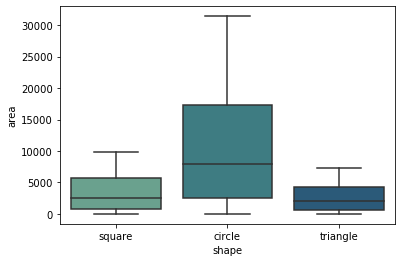

In [5]:
ax = sns.boxplot(x="shape", y="area", data=df, palette="crest")

In [6]:
# 2. Calculate the mean, max, and standard deviation of the area size of each color.

In [7]:
df.color.unique()

array(['yellow', 'blue', 'red', 'green'], dtype=object)

In [8]:
yellow_df = df.loc[df['color'] == 'yellow']
yellow_df.head()

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
5,square,yellow,4356.0
6,circle,yellow,78.5
8,square,yellow,1156.0


In [9]:
display(yellow_df.area.mean())
display(yellow_df.area.max())
display(yellow_df.area.std())

4538.208088235295

31415.9

5352.460578324455

In [10]:
blue_df = df.loc[df['color'] == 'blue']

In [11]:
display(blue_df.area.mean())
display(blue_df.area.max())
display(blue_df.area.std())

3208.1316666666735

21642.4

3039.2129648171303

In [12]:
red_df = df.loc[df['color'] == 'red']

In [13]:
display(red_df.area.mean())
display(red_df.area.max())
display(red_df.area.std())

3815.8710344827646

31415.9

5092.678376780838

In [14]:
green_df = df.loc[df['color'] == 'green']

In [15]:
display(green_df.area.mean())
display(green_df.area.max())
display(green_df.area.std())

5761.119230769232

27759.1

6695.029606348661

In [16]:
# 3. What is the average area size of a yellow square?

In [17]:
yellow_squares_df = df.loc[(df['color'] == 'yellow') & (df['shape'] =='square')]
yellow_squares_df['area'].mean()

3333.2072072072074

In [18]:
# 4. Which shape is most likely to be green?

In [19]:
green_df['shape'].value_counts(normalize=True)

# Squares are most likely to be green.
# Interestingly, there are no green triangles!

square    0.602564
circle    0.397436
Name: shape, dtype: float64

In [20]:
# 5. Given the fact that the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?

In [21]:
big_red_df = df.loc[(df['color'] == 'red') & (df['area'] > 3000)]

In [22]:
big_red_df['shape'].value_counts(normalize=True)

# traingles are about 67% of those big red shapes
# squares and circles each make up about 16%

triangle    0.672
square      0.168
circle      0.160
Name: shape, dtype: float64

In [23]:
# 6. Write a function that calculates the side or radius of an object, depending on the shape and area of the object [for an equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].

In [24]:
# circle: area/pi (radius)
# square: area/sqrt
# triangle: area = (side ^ 2) * sqrt(3) / 4

import math

def side(df):
    if df['shape']== 'circle':
        return math.sqrt((df['area']/ 3.14159))
    elif df['shape'] == 'square':
        return math.sqrt(df['area'])
    else:
        # in this dataset, should only be triangles left
        return math.sqrt((df['area'])/.433)


In [25]:
# 7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radius).

In [26]:
df['side'] = round(df.apply(side, axis=1),0)
df.head()

,shape,color,area,side
0,square,yellow,9409.0,97.0
1,circle,yellow,4071.5,36.0
2,triangle,blue,2028.0,68.0
3,square,blue,3025.0,55.0
4,square,blue,9216.0,96.0


In [27]:
# 8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?

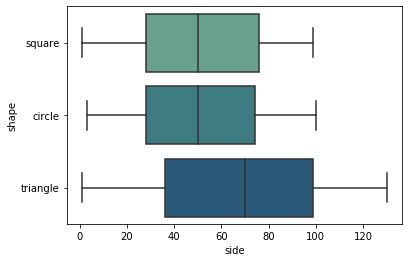

In [28]:
ax = sns.boxplot(y="shape", x="side", data=df, palette="crest")

# side length of square is very similar to radius of circle data
# median, outliers are almost at the same value (around 50)
# spread of triangle is a bit bigger
# all three are remarkably symmetrical

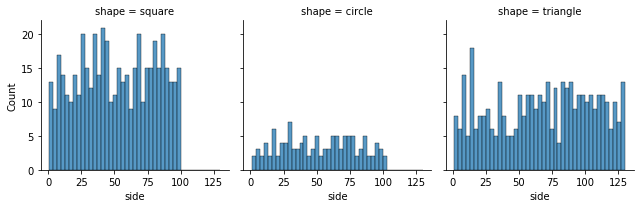

In [29]:
# checking the distribution here - just exploratory

sns.displot(
    df, x="side", col="shape",
    binwidth=3, height=3, palette="crest")

In [30]:
# 9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.

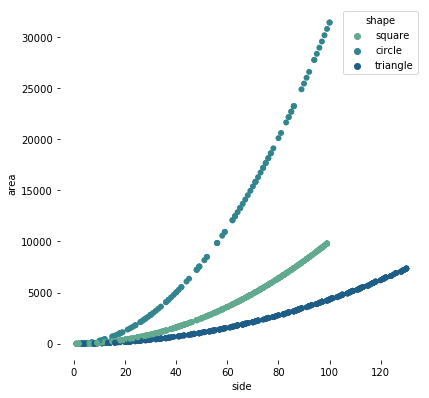

In [31]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="side", y="area",
                hue="shape", linewidth=0,
                data=df, ax=ax, palette="crest")

In [32]:
# 10. Create a dataframe, table or list that show for each shape:

         # a. The proportion of red objects within the shape

         # b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).

In [33]:
# 10a: I'm taking this to mean what percentage of objects are red, by each shape.

In [34]:
red_totals = df.groupby(['shape', 'color']).agg({'shape': 'count'})
red_percent = red_totals.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
red_percent

shape
shape    color            
circle   blue     7.500000
         green   25.833333
         red     25.000000
         yellow  41.666667
square   blue    31.865828
         green    9.853249
         red     11.740042
         yellow  46.540881
triangle blue    49.379653
         red     50.620347

In [35]:
#10b: The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).

In [36]:
# let's create a new dataframe for this (so we don't modify the original)
area_df = df.copy()

In [37]:
# First, let's sum the area of all shapes
area_sum = area_df.agg({'area' :['sum']})
area_sum = int(area_sum.values)

In [38]:
# Now, let's get the sum of blue areas
blue_area = area_df.loc[area_df['color'] == 'blue']
blue_sum = blue_area.agg({'area' :['sum']})
blue_sum = int(blue_sum.values)

In [39]:
# perfect, now let's combine them in a table

from prettytable import PrettyTable

t = PrettyTable(['Shape Detail','Total Area', 'Blue Area', 'Blue Percent'])
t.add_row(['All',area_sum, blue_sum, round((blue_sum/area_sum)*100, 2)])

In [40]:
print(t)

+--------------+------------+-----------+--------------+
| Shape Detail | Total Area | Blue Area | Blue Percent |
+--------------+------------+-----------+--------------+
|     All      |  3945289   |  1154927  |    29.27     |
+--------------+------------+-----------+--------------+


In [41]:
# and now let's do that shape by shape
circle_area = area_df.loc[area_df['shape'] == 'circle']
circle_area_sum = circle_area.agg({'area' :['sum']})
circle_area_sum = int(circle_area_sum.values)

# for this question, we want ONLY the values
# we're taking an extra line to return this in a "cleaner" format

In [42]:
blue_circle_area = area_df.loc[(area_df['shape'] == 'circle') & (area_df['color'] == 'blue')]
blue_circle_sum = blue_circle_area.agg({'area' :['sum']})
blue_circle_sum = int(blue_circle_sum.values)

In [43]:
# add those to the table
t.add_row(['Circle', circle_area_sum, blue_circle_sum, round((blue_circle_sum/circle_area_sum)*100, 2)])
print(t)

+--------------+------------+-----------+--------------+
| Shape Detail | Total Area | Blue Area | Blue Percent |
+--------------+------------+-----------+--------------+
|     All      |  3945289   |  1154927  |    29.27     |
|    Circle    |  1284417   |   78665   |     6.12     |
+--------------+------------+-----------+--------------+


In [44]:
# repeat this for squares

square_area = area_df.loc[area_df['shape'] == 'square']
square_area_sum = square_area.agg({'area' :['sum']})
square_area_sum = int(square_area_sum.values)

In [45]:
blue_square_area = area_df.loc[(area_df['shape'] == 'square') & (area_df['color'] == 'blue')]
blue_square_sum = blue_square_area.agg({'area' :['sum']})
blue_square_sum = int(blue_square_sum.values)

In [46]:
t.add_row(['Square', square_area_sum, blue_square_sum, round((blue_square_sum/square_area_sum)*100, 2)])
print(t)

+--------------+------------+-----------+--------------+
| Shape Detail | Total Area | Blue Area | Blue Percent |
+--------------+------------+-----------+--------------+
|     All      |  3945289   |  1154927  |    29.27     |
|    Circle    |  1284417   |   78665   |     6.12     |
|    Square    |  1627190   |   586415  |    36.04     |
+--------------+------------+-----------+--------------+


In [47]:
# and lastly, for triangles

triangle_area = area_df.loc[area_df['shape'] == 'triangle']
triangle_area_sum = triangle_area.agg({'area' :['sum']})
triangle_area_sum = int(triangle_area_sum.values)

In [48]:
blue_triangle_area = area_df.loc[(area_df['shape'] == 'triangle') & (area_df['color'] == 'blue')]
blue_triangle_sum = blue_triangle_area.agg({'area' :['sum']})
blue_triangle_sum = int(blue_triangle_sum.values)

In [49]:
t.add_row(['Triangle', triangle_area_sum, blue_triangle_sum, round((blue_triangle_sum/triangle_area_sum)*100, 2)])
print(t)

+--------------+------------+-----------+--------------+
| Shape Detail | Total Area | Blue Area | Blue Percent |
+--------------+------------+-----------+--------------+
|     All      |  3945289   |  1154927  |    29.27     |
|    Circle    |  1284417   |   78665   |     6.12     |
|    Square    |  1627190   |   586415  |    36.04     |
|   Triangle   |  1033681   |   489847  |    47.39     |
+--------------+------------+-----------+--------------+


In [50]:
#11. Create a function that calculates 10. b. for a given shape and color.

In [51]:
shapes = ['circle', 'square', 'triangle']

for shape in shapes:
    if shape == 'circle':
        circle_area = area_df.loc[area_df['shape'] == 'circle']
        circle_area_sum = circle_area.agg({'area' :['sum']})
        circle_area_sum = int(circle_area_sum.values)
        blue_circle_area = circle_area.loc[circle_area['color'] == 'blue']
        blue_circle_sum = blue_circle_area.agg({'area' :['sum']})
        blue_circle_sum = int(blue_circle_sum.values)
        print('Circle: ',round((blue_circle_sum/circle_area_sum)*100, 2),'%')
    if shape == 'square':
        square_area = area_df.loc[area_df['shape'] == 'square']
        square_area_sum = square_area.agg({'area' :['sum']})
        square_area_sum = int(square_area_sum.values)
        blue_square_area = square_area.loc[area_df['color'] == 'blue']
        blue_square_area = blue_square_area.agg({'area' :['sum']})
        blue_square_area = int(blue_square_area.values)
        print('Square: ',round((blue_square_sum/square_area_sum)*100, 2),'%')
    if shape == 'triangle':
        triangle_area = area_df.loc[area_df['shape'] == 'triangle']
        triangle_area_sum = triangle_area.agg({'area' :['sum']})
        triangle_area_sum = int(triangle_area_sum.values)
        blue_tri_area = triangle_area.loc[area_df['color'] == 'blue']
        blue_tri_area = blue_tri_area.agg({'area' :['sum']})
        blue_tri_area = int(blue_tri_area.values)
        print('Triangle: ',round((blue_triangle_sum/triangle_area_sum)*100, 2),'%')

Circle:  6.12 %
Square:  36.04 %
Triangle:  47.39 %
